In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

file_name = "data/210407/soc_210407.h5"
h5_file = h5py.File(file_name, "r")

In [2]:
insertions = list(h5_file['session001/cal001'].keys())
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

In [3]:
vis_ins1 = h5_file['session001/cal001/ins001/spectrometer1/derived/absorbances'][:]

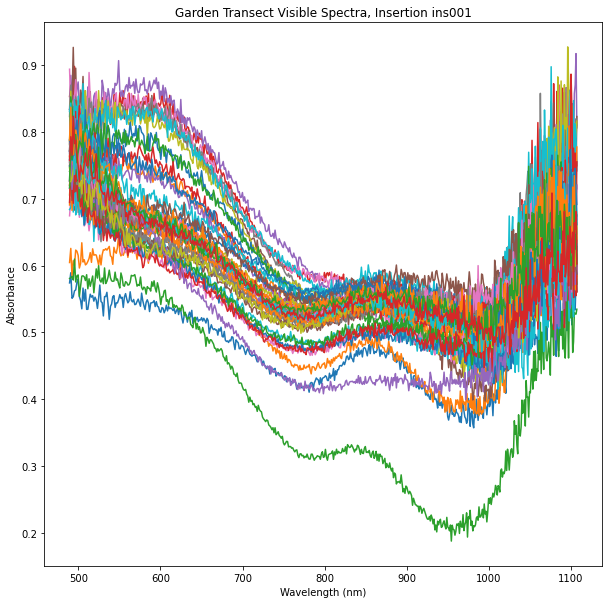

In [4]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title(f"Garden Transect Visible Spectra, Insertion ins001")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
for i in range (vis_ins1.shape[0]):
    ax.plot(vis_waves, vis_ins1[i, :])
plt.show()

In [7]:
y1 = vis_ins1[0, :]

In [18]:
y1_filter = savgol_filter(y1, 21, 3)

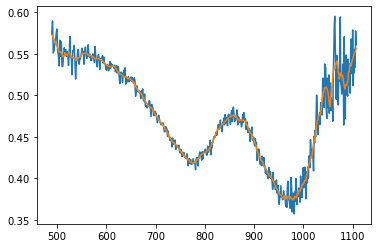

In [19]:
plt.plot(vis_waves, y1)
plt.plot(vis_waves, y1_filter)

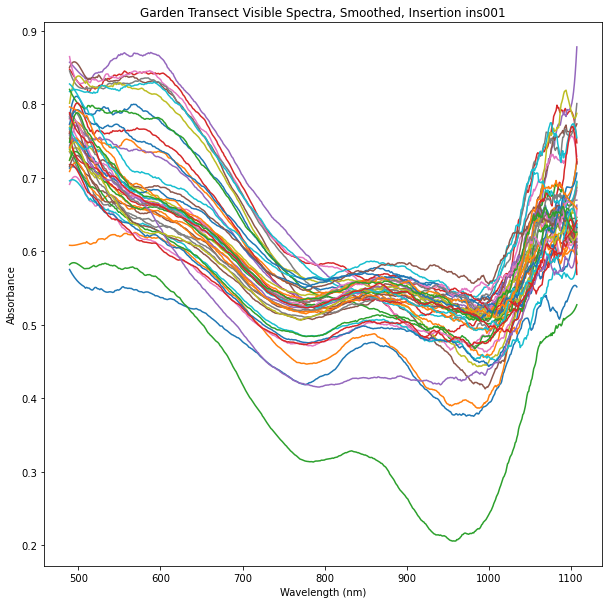

In [27]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title(f"Garden Transect Visible Spectra, Smoothed, Insertion ins001")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
for i in range (vis_ins1.shape[0]):
    abs_filter = savgol_filter(vis_ins1[i, :], 25, 3)
    ax.plot(vis_waves, abs_filter)
plt.show()

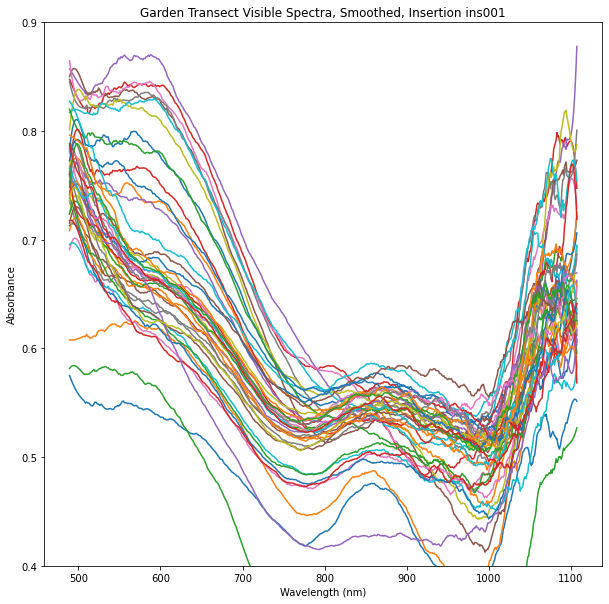

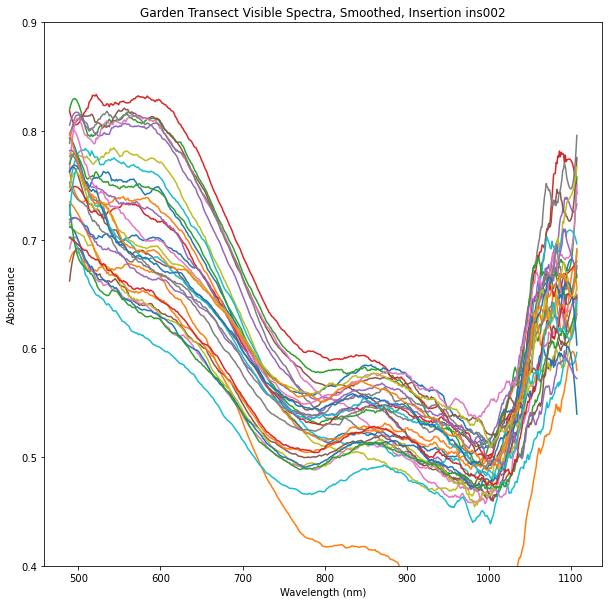

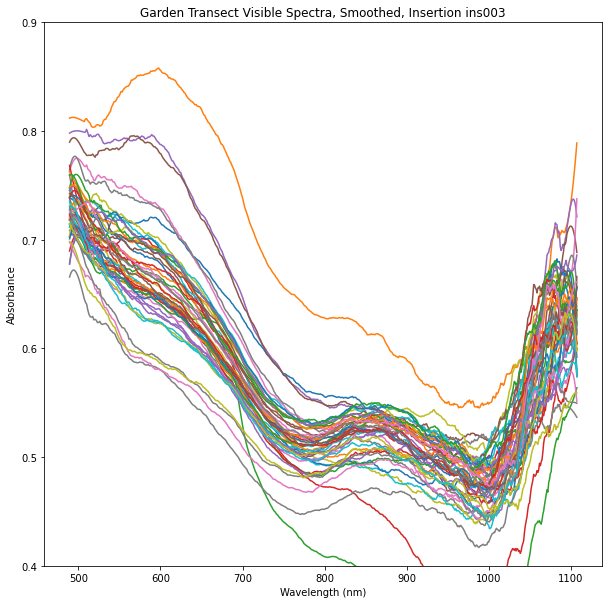

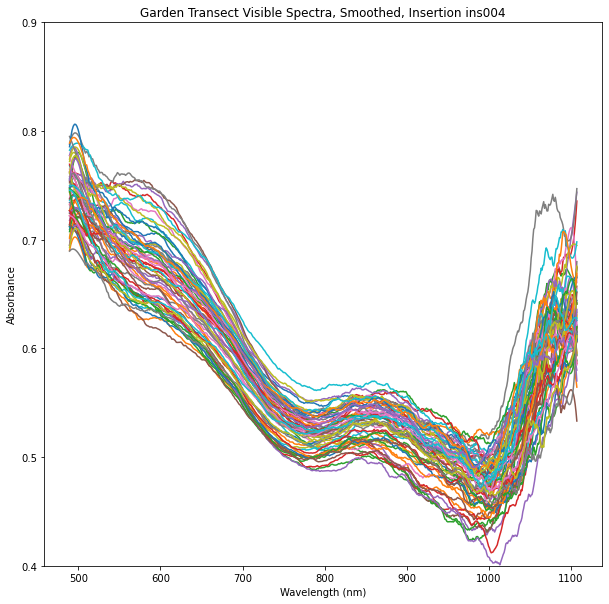

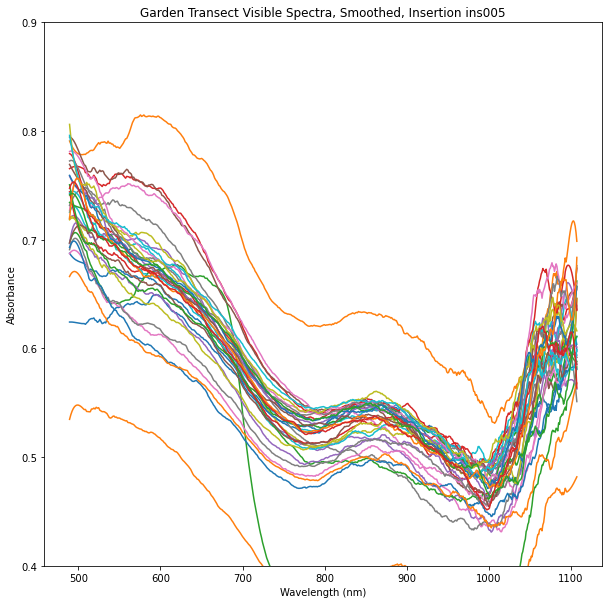

In [30]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Garden Transect Visible Spectra, Smoothed, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.4, 0.9)
    for i in range (ins_abs.shape[0]):
        ins_abs_filter = savgol_filter(ins_abs[i, :], 25, 3)
        ax.plot(vis_waves, ins_abs_filter)
    plt.show()

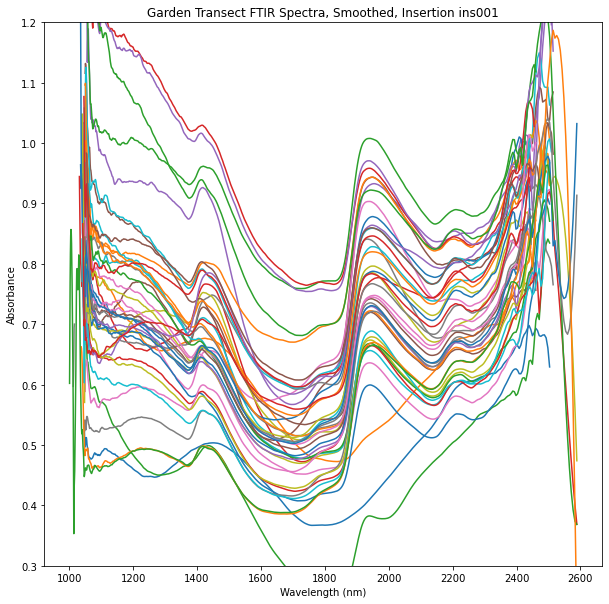

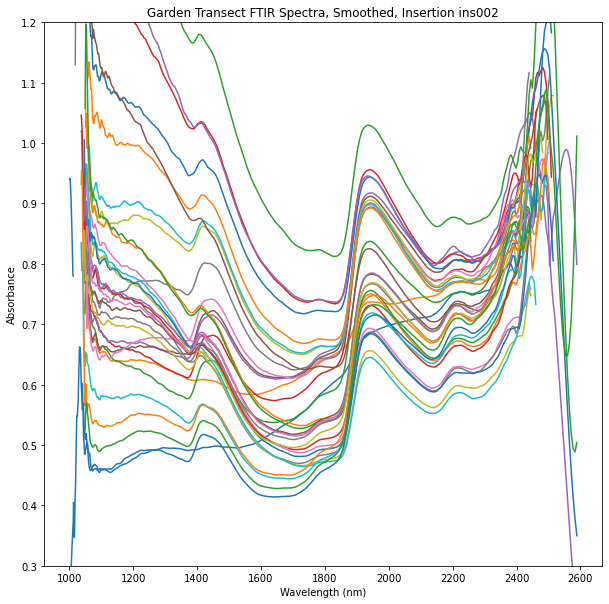

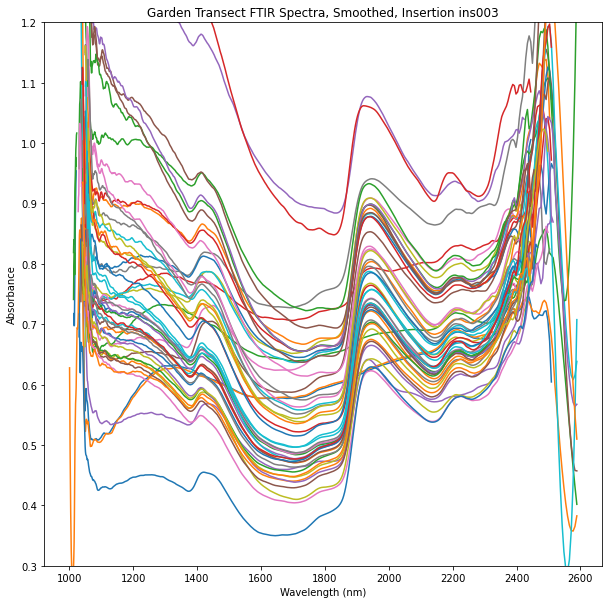

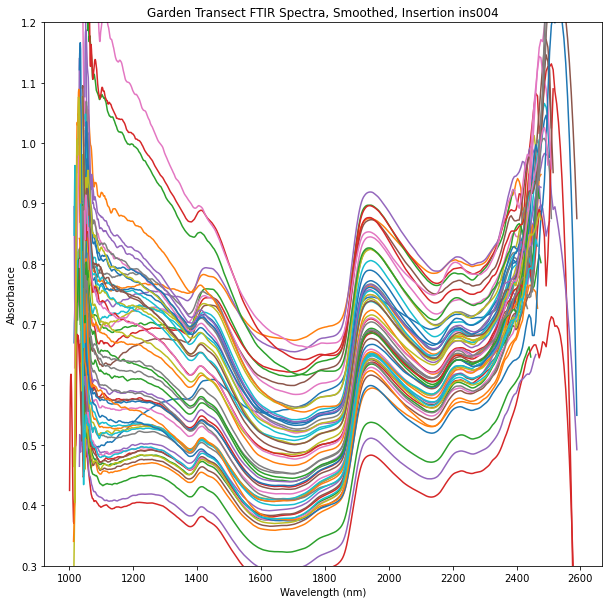

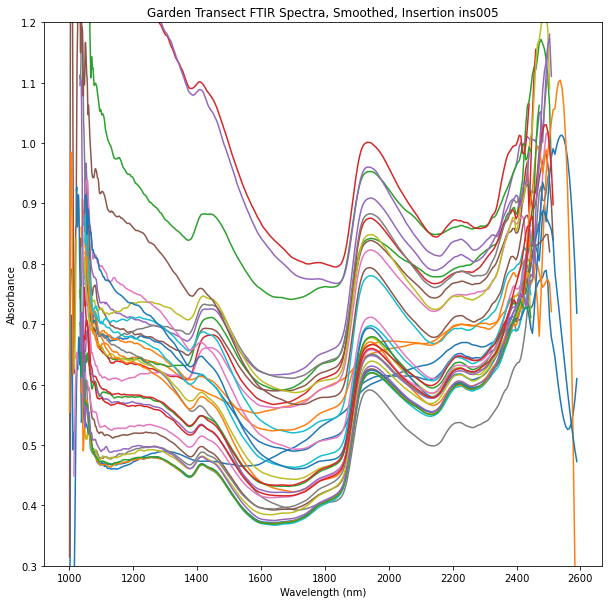

In [32]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Garden Transect FTIR Spectra, Smoothed, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.2)
    for i in range (ins_abs.shape[0]):
        ins_abs_filter = savgol_filter(ins_abs[i, :], 25, 3)
        ax.plot(ftir_waves, ins_abs_filter)
    plt.show()

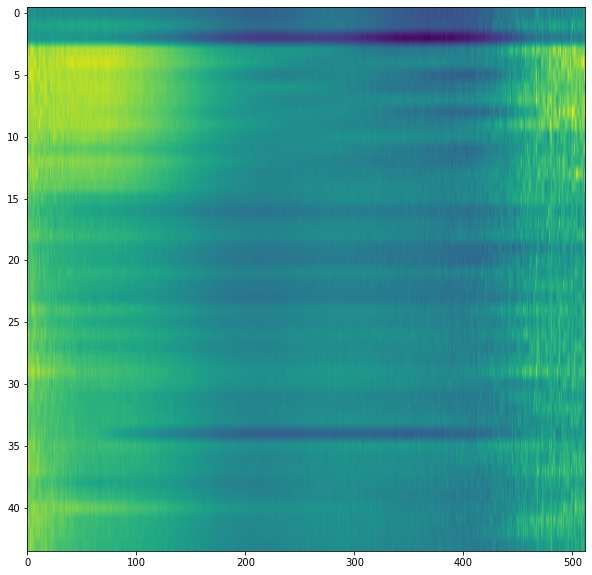

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(vis_ins1, aspect='auto')

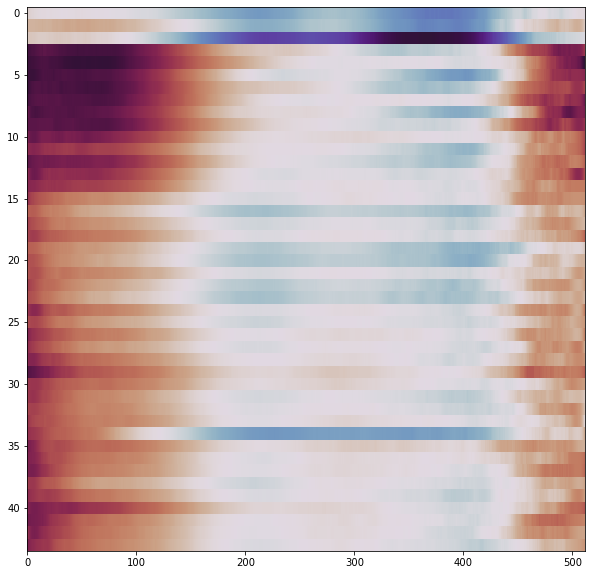

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(savgol_filter(vis_ins1, 25, 3, axis=1), aspect='auto',  interpolation='none', cmap='twilight_shifted')

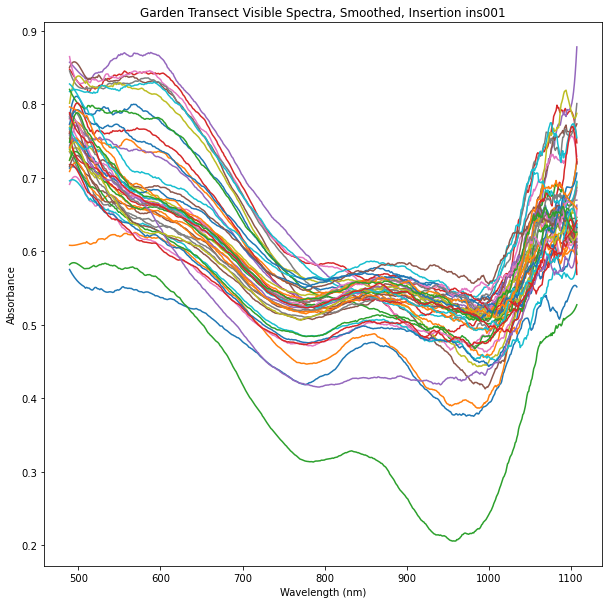

In [40]:
fix, ax = plt.subplots(figsize=(10,10))
ax.set_title(f"Garden Transect Visible Spectra, Smoothed, Insertion ins001")
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
for i in range (vis_ins1.shape[0]):
    abs_filter = savgol_filter(vis_ins1, 25, 3, axis=1)
    ax.plot(vis_waves, abs_filter[i, :])
plt.show()

In [53]:
depth_ins1 = h5_file['session001/cal001/ins001/derived/absorbance_depth'][:, -1]

In [59]:
depth_ins1.shape

(44,)

In [58]:
vis_waves.shape

(512,)

In [68]:
a2d = np.column_stack((vis_waves, depth_ins1))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 512 and the array at index 1 has size 44

In [63]:
a2d.shape

(556,)

In [95]:
blah = np.array([depth_ins1[0], vis_waves[0], vis_ins1[0]])
for i in range(1, depth_ins1.shape[0]):
    for j in range(1, vis_waves.shape[0]):
        x = depth_ins1[i]
        y = vis_waves[j]
        z = vis_ins1[i, j]
        a = np.array([x, y, z])
        blah = np.vstack((blah, a))
        

        
    

<ipython-input-95-7778f556cb39>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  blah = np.array([depth_ins1[0], vis_waves[0], vis_ins1[0]])


In [84]:
blah1 = np.array([1, 1, 1])

In [88]:
output = np.vstack((blah, blah1))
output

array([[0, 0, 0],
       [1, 1, 1]])

In [89]:
blah2 = np.array([2, 2, 2])

In [91]:
output = np.vstack((output, blah2))

In [92]:
output

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [94]:
blah

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.98532028e+00,  4.89310417e+02,  5.74005002e-01],
       [-1.98532028e+00,  4.90812062e+02,  5.89227127e-01],
       ...,
       [ 6.14770874e+01,  1.10497911e+03,  6.54139503e-01],
       [ 6.14770874e+01,  1.10598899e+03,  6.80522760e-01],
       [ 6.14770874e+01,  1.10699919e+03,  6.02189124e-01]])

In [96]:
blah = np.array([depth_ins1[0], vis_waves[0], vis_ins1[0]])

<ipython-input-96-7c5fe1516d0d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  blah = np.array([depth_ins1[0], vis_waves[0], vis_ins1[0]])


In [98]:
depth_ins1[0]

-1.9853202760219575

In [99]:
vis_waves[0]

489.310417071576

In [101]:
vis_ins1[0, 0]

0.57400500176975

In [106]:
ins1_array = np.zeros(44, 512)
for i in range(1, depth_ins1.shape[0]):
    for j in range(1, vis_waves.shape[0]):
        x = depth_ins1[i]
        y = vis_waves[j]
        
        a = np.array([x, y])
        ins1_array = np.vstack((ins1_array, a))

In [107]:
ins1_array.shape

(21974, 2)

In [104]:
vis_ins1.shape

(44, 512)

In [105]:
44 * 512

22528

In [108]:
vis_waves.shape

(512,)

In [109]:
depth_ins1.shape

(44,)

In [113]:
blah_array = np.zeros((10, 3))
for i in range(10):
    for j in range(3):
        blah_array[i, j] = i + j

In [115]:
blah_depth = np.full(10, 1)
blah_depth

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
blah_waves = np.array([10, 20, 30])

In [120]:
blah_array = np.zeros((10, 3))
for i in range(blah_depth.shape[0]):    
    blah_array[i] = blah_depth[i]
        

In [122]:
blah_array.shape

(10, 3)

In [174]:
y = depth_ins1
x = vis_waves
z = savgol_filter(vis_ins1, 15, 3, axis=1)
X, Y = np.meshgrid(x, y)

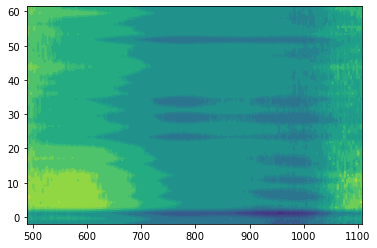

In [136]:
plt.contourf(X, Y, z)
plt.contour(X, Y, z)

Text(0, 0.5, 'Absorbance')

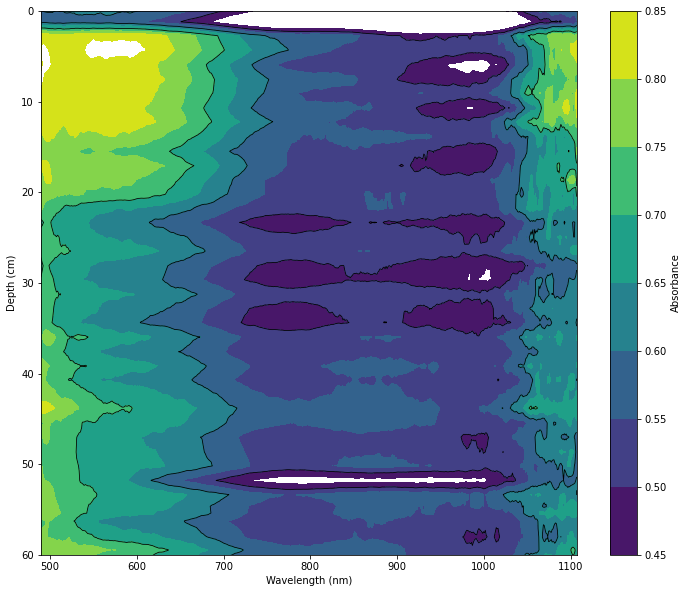

In [178]:
levels = [0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
clevels = [0.50, 0.60, 0.70]
fig, ax = plt.subplots(figsize = (12,10))
ax.set_ylim(60, 0)
ax.set_ylabel("Depth (cm)")
ax.set_xlabel("Wavelength (nm)")
cont = ax.contourf(X, Y, z, levels=levels)
ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

cbar = fig.colorbar(cont)
cbar.ax.set_ylabel('Absorbance')



Text(0, 0.5, 'Absorbance')

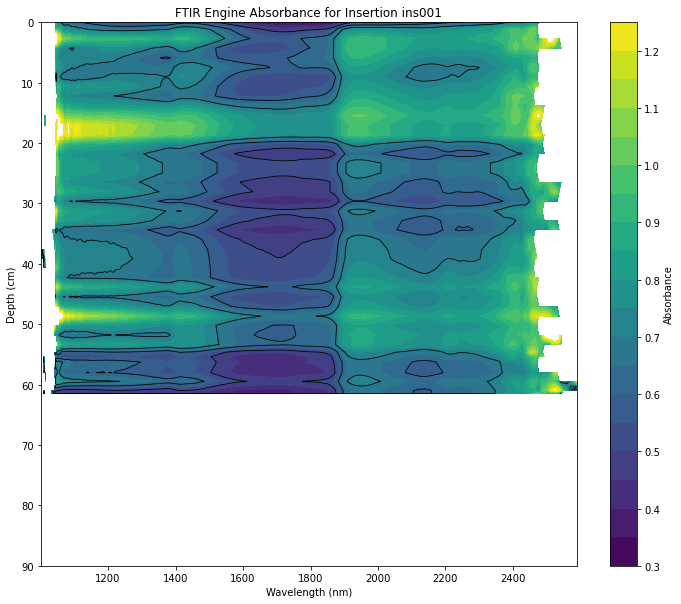

In [192]:
ins_abs = h5_file[f'session001/cal001/ins001/derived/absorbance_depth'][:, 512:-2]
ins_depths = h5_file[f'session001/cal001/ins001/derived/absorbance_depth'][:, -1]
y = ins_depths
x = ftir_waves
z = savgol_filter(ins_abs, 15, 3, axis=1)
X, Y = np.meshgrid(x, y)

levels = np.arange(0.3, 1.3, 0.05)
clevels = [0.50, 0.60, 0.70]
fig, ax = plt.subplots(figsize = (12,10))

ax.set_ylim(90, 0)
ax.set_ylabel("Depth (cm)")
ax.set_xlabel("Wavelength (nm)")
ax.set_title(f"FTIR Engine Absorbance for Insertion ins001")
cont = ax.contourf(X, Y, z, levels=levels)
ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

cbar = fig.colorbar(cont)
cbar.ax.set_ylabel('Absorbance')

In [179]:
ins_abs = h5_file[f'session001/cal001/ins001/derived/absorbance_depth'][:, 512:-2]

In [180]:
ins_abs.shape

(44, 700)

In [181]:
ftir_waves.shape

(700,)

In [188]:
levels = np.arange(0.3, 1.2, 0.05)

In [189]:
levels

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15])

In [193]:
h5_file.close()
file_name = "data/210407/nirone_210407.h5"
h5_file = h5py.File(file_name, "r")
insertions = list(h5_file['session002/cal002'].keys())
waves = h5_file['session002/cal002'].attrs['spec1_wavelengths_vector'][:]

In [198]:
ins_abs = h5_file[f'session002/cal002/ins001/spectrometer1/derived/absorbances'][:]
ins_depths = h5_file[f'session002/cal002/ins001/derived/absorbance_depth'][:, -1]
y = ins_depths
x = waves
z = savgol_filter(ins_abs, 15, 3, axis=1)
X, Y = np.meshgrid(x, y)

Text(0, 0.5, 'Absorbance')

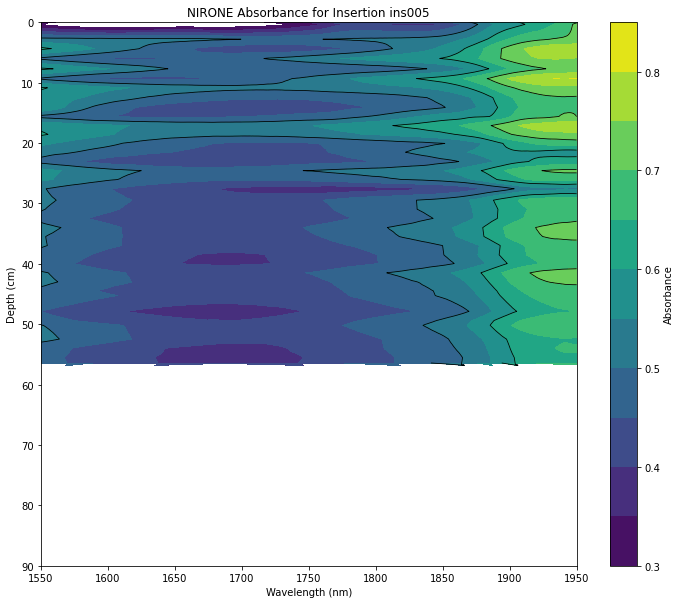

In [200]:
levels = [0.3, 0.35, 0.4, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
clevels = [0.50, 0.60, 0.70]
fig, ax = plt.subplots(figsize = (12,10))

ax.set_ylim(90, 0)
ax.set_ylabel("Depth (cm)")
ax.set_xlabel("Wavelength (nm)")
ax.set_title(f"NIRONE Absorbance for Insertion {insertion}")
cont = ax.contourf(X, Y, z, levels=levels)
ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

cbar = fig.colorbar(cont)
cbar.ax.set_ylabel('Absorbance')

In [201]:
amin = ins_abs.min()

In [202]:
amin

0.2377610382302572

In [203]:
amax = ins_abs.max()

In [204]:
amax

0.8033282730309708

In [205]:
amin % 0.05

0.0377610382302572

In [206]:
amin - (amin % 0.05)

0.2

In [207]:
np.arange((amin - amin % 0.05), amax, 0.05)

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 ])